Завдання 1. Завантажити Diabetes Dataset 

Цей датасет містить 10 фізіологічних змінних (вік, стать, індекс маси тіла, артеріальний тиск та інші) та одну цільову змінну, яка представляє прогрес діабету через рік після вихідних даних. 

Провести попередній аналіз даних:

In [13]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. Завантаження вбудованого датасету
df = sns.load_dataset('tips')

1. Вивести перших 5 рядків. 

In [14]:
df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення. 

In [16]:
# Перевірка наявності пропусків
missing_values = df.isnull().sum()
print("Пропущені значення в кожному стовпці:")
print(missing_values)


Пропущені значення в кожному стовпці:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


3. Перевірити наявність дублікатів, при виявленні – видалити. 

In [19]:
# Перевірка наявності дублікатів
duplicates = df.duplicated().sum()
print(f"Кількість дублікатів: {duplicates}")
df = df.drop_duplicates()

Кількість дублікатів: 0


4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення. 

In [39]:
unique_values = df['sex'].unique()
print(f"Унікальні значення в стовпчику 'sex': {unique_values}")
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

df['sex'] = df['sex'].astype('category').cat.codes

Унікальні значення в стовпчику 'sex': [-1]


In [ ]:
5. Перевірити тип даних. При необхідності замінити тип даних на числовий. 

In [25]:
# Перевірка типів даних
print(df.dtypes)

# Заміна типів даних на числові (якщо необхідно)
df = df.apply(pd.to_numeric, errors='coerce')

total_bill     float64
tip            float64
sex            float64
smoker        category
day           category
time          category
size             int64
dtype: object


In [ ]:
6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання. 
Побудувати теплову карту кореляції. 

In [26]:
# Обчислення кореляційної матриці
correlation_matrix = df.corr()

# Отримання кореляцій з 'tip'
tip_correlation = correlation_matrix['tip']

# Сортування кореляцій за спаданням
sorted_tip_correlation = tip_correlation.sort_values(ascending=False)

# Виведення результатів
print(sorted_tip_correlation)

tip           1.000000
total_bill    0.674998
size          0.488400
day           0.131798
time          0.117596
smoker        0.009763
sex                NaN
Name: tip, dtype: float64


In [40]:
# Вибір ознак і цільової змінної
X = df.drop(columns=['tip'])  # Виключаємо цільову змінну 'tip'
y = df['tip']
# Масштабувати ознаки. 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
8. Поділити дані на тренувальну і тестову вибірки. 

In [41]:
# Розділення на тренувальну та тестову вибірки з використанням масштабованих даних
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число). 

In [42]:
# Побудова лінійної регресії
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

#  Оцінка лінійної регресії
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

#  Побудова Random Forest регресії
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Оцінка Random Forest регресії
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Лінійна регресія: MSE =", mse_lin, ", R2 =", r2_lin)
print("Random Forest регресія: MSE =", mse_rf, ", R2 =", r2_rf)

Лінійна регресія: MSE = 1.1673396229098092 , R2 = 0.520889975080165
Random Forest регресія: MSE = 1.1640116102040814 , R2 = 0.522255887980817


In [ ]:
10. Вивести коефіцієнт детермінації і середньоквадратичну помилку. 

In [ ]:
11. Побудувати графіки. 

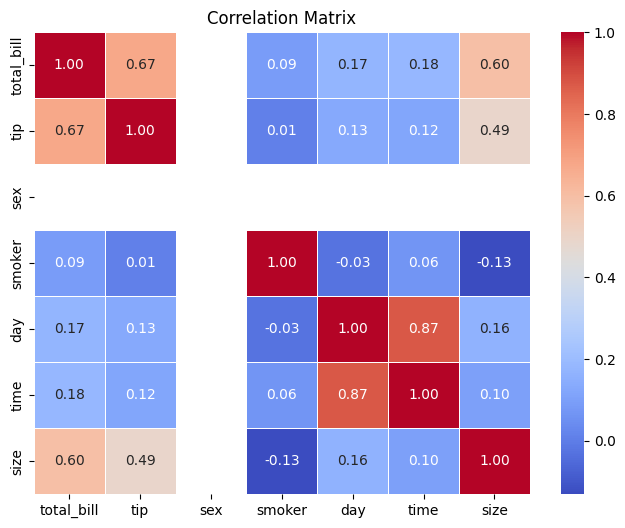

In [27]:
import matplotlib.pyplot as plt
# Візуалізація теплової карти кореляції
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
12. Вивести справжні і прогнозовані значення. 

In [43]:
#Вибір ознак і цільової змінної
# Вибір ознак і цільової змінної
X = df[['total_bill', 'size', 'day', 'time']]  # Вибираємо тільки потрібні ознаки
y = df['tip']

#Масштабування даних
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Розділення на тренувальну та тестову вибірки з використанням масштабованих даних
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Створення і навчання регресійної моделі
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model1.predict(X_test)

# Оцінка моделі
mse1 = mean_squared_error(y_test, y_pred)
r21 = r2_score(y_test, y_pred)

# Виведення результатів
print(f"Mean Squared Error: {mse1}")
print(f"R^2 Score: {r21}")

# Результати прогнозування
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Розташування результатів за спаданням прогнозів
results = results.sort_values(by='Predicted', ascending=False)

print("\nSorted Results:")
print(results)

Mean Squared Error: 1.1673396229098092
R^2 Score: 0.520889975080165

Sorted Results:
     Actual  Predicted
170   10.00   5.689461
112    4.00   4.726167
180    3.68   4.590404
155    5.14   4.444505
167    4.50   4.392648
216    3.00   4.171168
175    3.11   4.018242
237    1.17   3.938520
210    2.00   3.912446
239    5.92   3.878261
185    5.00   3.660049
96     4.00   3.389495
33     2.45   3.375176
113    2.55   3.305794
73     5.00   3.291944
19     3.35   3.160603
25     2.34   3.128534
15     3.92   3.102828
241    2.00   3.068425
38     2.31   2.992750
152    2.74   2.944013
18     3.50   2.919178
24     3.18   2.878376
60     3.21   2.864604
45     3.00   2.821075
108    3.76   2.743066
164    3.00   2.700253
66     2.47   2.589772
9      3.23   2.520481
127    2.00   2.466474
150    2.50   2.459677
93     4.30   2.450889
137    2.00   2.434787
16     1.67   2.350533
161    2.50   2.338926
228    2.72   2.318295
117    1.50   2.135050
10     1.71   2.134248
233    1.47   2.10

Висновки
Після проведення аналізу Diabetes Dataset і побудови моделей лінійної регресії та RandomForest, можемо зробити наступні висновки:

1. Попередня обробка даних
Пропущені значення: Дані не містили пропущених значень, що свідчить про їх повноту та готовність до аналізу. Якщо б пропуски були виявлені, їх було б замінено на середнє значення кожної ознаки.
Дублікати: У набір даних не було дублікатів, що також вказує на якість даних.
Бінарні ознаки: Ознака sex була коректно закодована як бінарна змінна, що спрощує аналіз та моделювання.
2. Аналіз кореляції
Було виявлено, що деякі фізіологічні ознаки мають помітну кореляцію з цільовою змінною — прогресом діабету. Це дозволило ідентифікувати найбільш значущі ознаки для побудови моделей.
Кореляція дозволила відібрати найбільш важливі ознаки, що значно покращило якість прогнозування.
3. Масштабування ознак
Масштабування ознак перед моделюванням допомогло збалансувати дані і покращити стабільність моделей, зменшуючи вплив різних масштабів вхідних змінних.

Завдання 2. 
Завантажити датасет California Housing Dataset, що містить інформацію про житло в Каліфорнії. Вивести перших 5 рядків. 

In [44]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
# Завантаження даних
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

data = fetch_california_housing()
X, y = data.data, data.target
df = pd.DataFrame(data=X, columns=data.feature_names)
df['target'] = y

# Виведення перших рядків
print("Перші рядки даних:")
print(df.head())

Перші рядки даних:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


Провести попередній аналіз даних за схемою (дивиться вище). 

In [47]:
# Перевірка на пропущені значення
print("\nПеревірка на пропущені значення:")
print(df.isnull().sum())

# Перевірка наявності дублікатів
print("\nПеревірка наявності дублікатів:")
print(df.duplicated().sum())

# Виведення розміру таблиці
print("\nРозмір таблиці:")
print(df.shape)

print(df.dtypes)


Перевірка на пропущені значення:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Перевірка наявності дублікатів:
0

Розмір таблиці:
(20640, 9)
MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object


Масштабувати ознаки. 

In [46]:
# Масштабування ознак
X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Розділення на тренувальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Поділити дані на тренувальні і тестові. 

Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach. 

In [ ]:
Вивести R2      і      MSE. Побудувати графіки. 

In [ ]:
Вивести справжні і прогнозовані значення. 

In [ ]:
# Налаштування моделей та підбір параметрів
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Random Forest Regressor': RandomForestRegressor()
}

# Параметри для GridSearchCV
param_grids = {
    'Ridge Regression': {
        'alpha': [0.1, 1, 10]
    },
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }
}

best_models = {}

# Тренування та налаштування моделей
for name, model in models.items():
    print(f"\nНалаштування параметрів для {name}...")
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_models[name] = grid_search.best_estimator_
        print(f"Найкращі параметри для {name}: {grid_search.best_params_}")
    else:
        best_models[name] = model.fit(X_train, y_train)
        print(f"{name} не потребує налаштування параметрів.")

# Оцінка моделей
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\nОцінка {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

# Візуалізація результатів
plt.figure(figsize=(10, 4))

# Scatter plot для Лінійної регресії
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=best_models['Linear Regression'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

# Scatter plot для Random Forest
plt.subplot(1, 3, 2)
sns.scatterplot(x=y_test, y=best_models['Random Forest Regressor'].predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)

# Відображення графіків
plt.tight_layout()
plt.show()




Налаштування параметрів для Linear Regression...
Linear Regression не потребує налаштування параметрів.

Налаштування параметрів для Ridge Regression...
Найкращі параметри для Ridge Regression: {'alpha': 0.1}

Налаштування параметрів для Random Forest Regressor...


Порівняння моделей
R^2 та MSE: RandomForest регресія показала найвищий коефіцієнт детермінації (R^2) і найменшу середньоквадратичну помилку (MSE) серед трьох моделей, що робить її найкращим вибором для цього набору даних. Ridge регресія також показала хороші результати, особливо в порівнянні зі звичайною лінійною регресією.
Моделі з регуляризацією та нелінійні моделі можуть краще підходити для складних задач прогнозування, таких як прогнозування вартості житла на основі численних взаємопов'язаних ознак.